# Outliers:
* Outliers in data are observations that deviate significantly from the other values in a dataset.
* Outliers are data points that significantly differ from the rest of the dataset, often indicating variability or errors. They can provide insights or affect statistical analyses and interpretations.



## Different Names of Outliers
1. Outliers
2. Noise
3. Deviants
4. Abnormalities
5. Extreme Values
6. Anomalous Points
7. Abberrant Observations 

## Types of Outliers
- Global Outliers
- Local Outliers
- Contextual Outliers
- Collective Outliers
- Univariate Outliers
- Multivariate Outliers
- Influential Points
- Censored Data Points
- Temporal Outliers
- Spatial Outliers
- Categorical Outliers
- Recurring Outliers
- Periodic Outliers

## Effects of Outliers
- Skewed Results
- Increased Variance
- Influence on Models
- Bias in Statistical Tests
- Detection of Novel Insights
- Data Quality Issues

## Causes of Outliers
- Measurement Errors
- Instrument Limitations
- Data Entry Errors
- Natural Variability
- Sampling Errors
- Changes in Process
- Contextual Factors
- Novelty or Innovation
- Censoring
- Data Transformation
- Intentional Outliers
- Data Processing Errors
- Experimental Errors

## Why to Identify Outliers
1. To find hidden clues
2. Data quality
3. Statistical analysis
4. For better model performance
5. For better visualiazation
6. For handling risk management
7. For trend identification
   

## Outliers Detection Methods
1. Z-Score
2. IQR (interquartile range)
3. Box Plot
4. Scatter Plot
5. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
6. Isolation Forest
7. K-Means Clustering
8. K-Nearest Neighbors

## Outliers Removal Methods
**1. Thresholding:**  Remove points that exceed predefined thresholds (e.g., Z-score > 3).\
**2. Winsorizing:**  Replace outliers with the nearest non-outlier values.\
**3. Trimming:**   Remove a certain percentage of the highest and lowest values.\
**4. Imputation:** Replace outliers with mean, median, or mode values based on the dataset.\
**5. Transformation:** Apply transformations (e.g., log, square root) to reduce the impact of outliers.\
**6. Robust Statisical method:** Models that are less sensitive on outliers through statistical methods

## 1. Remove Outliers with Z-Score Method

The formula for the Z-score is:

Z = (X - μ) / σ

Where:

Z = Z-score\
X = the value of the data point\
μ = mean of the dataset\
σ = standard deviation of the dataset

This formula tells you how many standard deviations a data point (X) is from the mean (μ).

In [80]:
# Step.1:Import Libraries
import pandas as pd
import numpy as np

#Step.2: Create a sample DataFrame
data = pd.DataFrame({"Age": [21,22,23,24,25,26,27,28,29,30,50]})
data

,Age
0,21
1,22
2,23
3,24
4,25
5,26
6,27
7,28
8,29
9,30


In [81]:
# Step.3 Calculate the Mean and Standard Deviation
mean = np.mean(data['Age'])
std = np.std(data['Age'])

# Step.4 Calculate the Z-Score for each data point
data['Z-Score'] = (data['Age'] - mean) / std
data

,Age,Z-Score
0,21,-0.890210
1,22,-0.757882
2,23,-0.625553
3,24,-0.493225
4,25,-0.360896
5,26,-0.228568
6,27,-0.096239
7,28,0.036090
8,29,0.168418
9,30,0.300747


In [82]:
# Step.5 Data with outliers
print("------------------------------------")
print(f" Data with Outliers:\n {data}")



------------------------------------
 Data with Outliers:
     Age   Z-Score
0    21 -0.890210
1    22 -0.757882
2    23 -0.625553
3    24 -0.493225
4    25 -0.360896
5    26 -0.228568
6    27 -0.096239
7    28  0.036090
8    29  0.168418
9    30  0.300747
10   50  2.947318


In [83]:
# Step 6. Print the outliers
print(f"Here are the outliers based on Z-Score threshold, 2.5:\n {data[data['Z-Score'] > 2.5 ]}")

Here are the outliers based on Z-Score threshold, 2.5:
     Age   Z-Score
10   50  2.947318


In [84]:
# Step 7. Remove the outliers
data_without_outliers = data[data['Z-Score'] <= 2.5]
data_without_outliers

,Age,Z-Score
0,21,-0.890210
1,22,-0.757882
2,23,-0.625553
3,24,-0.493225
4,25,-0.360896
5,26,-0.228568
6,27,-0.096239
7,28,0.036090
8,29,0.168418
9,30,0.300747


In [85]:
# Import Libraries
import numpy as np
from scipy import stats

# Sample Data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]  # 110.0 is an outlier

# Calculate Z-Scores for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold to identify outliers
threshold = 2.5
outliers = np.where(z_scores > threshold)[0]

# Print the data and their corresponding Z-scores
# print("----------------------------------")
# print("Data Points and Z-Scores:")
# for i, value in enumerate(data):
#     print(f"Value: {value}, Z-Score: {z_scores[i]}")

# Print the data
print("----------------------------------")
print("Data", data)
print("----------------------------------")

# Print indices of outliers
print("Indices of outliers:", outliers)
print("----------------------------------")

# Print the outlier values
print("Outlier Values:", [data[i] for i in outliers])

# Remove outliers from the data
data_without_outliers = [data[i] for i in range(len(data)) if i not in outliers]

print("----------------------------------")
print("Data without outliers:", data_without_outliers)

----------------------------------
Data [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------
Indices of outliers: [9]
----------------------------------
Outlier Values: [110.0]
----------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


## 2. IQR (Interquartile range) Method

The formula for the Interquartile Range (IQR) is:

IQR = Q3 - Q1

Where:

Q1 = First quartile (25th percentile)\
Q3 = Third quartile (75th percentile)

To detect outliers using IQR:

Lower bound = Q1 - 1.5 × IQR\
Upper bound = Q3 + 1.5 × IQR

Any data point outside these bounds is considered an outlier.


In [86]:
#Step.1 Import Libraries
import pandas as pd
import numpy as np

# Step.2 Create a sample DataFrame
data = pd.DataFrame({"Age":[20,21,22,23,24,25,26,27,28,29,30,50]})

# # Step.3 Calculate the first quartile (Q1) and third quartile (Q3)
# Q1 = data['Age'].quantile(0.25)
# Q3 = data['Age'].quantile(0.75)

#Step.3 Calculate the first quartile (Q1) and third quartile (Q3)
Q1 = np.percentile(data['Age'], 25, interpolation='midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation='midpoint')

# Step.4 Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Step.5 Determine the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step.6 print the data with outliers
print("------------------------------------")
print(f"Print the data with outliers:\n {data}")
print("------------------------------------")

# Step.7 Print the outliers
print(f"Here are the outliers based on IQR method:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")

# Step.8 Remove the outliers
data_without_outliers = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step.9 Print the data without outliers
print("------------------------------------")
print(f"Data without outliers: \n {data_without_outliers}")



------------------------------------
Print the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   50
------------------------------------
Here are the outliers based on IQR method:
     Age
11   50
------------------------------------
Data without outliers: 
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30


## 3. Clustering Method (K-Means)

In [89]:
# Import Libraries
from sklearn.cluster import KMeans

# Sample Data
data = [[2,2], [3,3], [3,4], [30,30], [31,31], [32,32]]  # (25,80), (24,78), and (30,90) are outliers

# Create a KMeans model with 2 clusters (normal data and outliers)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identiy outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1] # Assuming cluster 1 is the outlier cluster

# print original data
print("----------------------------------")
print("Data:", data)
print("----------------------------------")
print("Outliers based on K-Means clustering:", outliers)

# Remove outliers from the data
data_without_outliers = [data[i] for i, label in enumerate(labels) if label == 0] # Assuming cluster 0 is the normal data cluster
print("----------------------------------")
print("Data without outliers:", data_without_outliers)


----------------------------------
Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
----------------------------------
Outliers based on K-Means clustering: [[30, 30], [31, 31], [32, 32]]
----------------------------------
Data without outliers: [[2, 2], [3, 3], [3, 4]]


#### Another Example of dealing with outlier with the help of IQR method

Text(0.5, 1.0, 'Box Plot without Outliers')

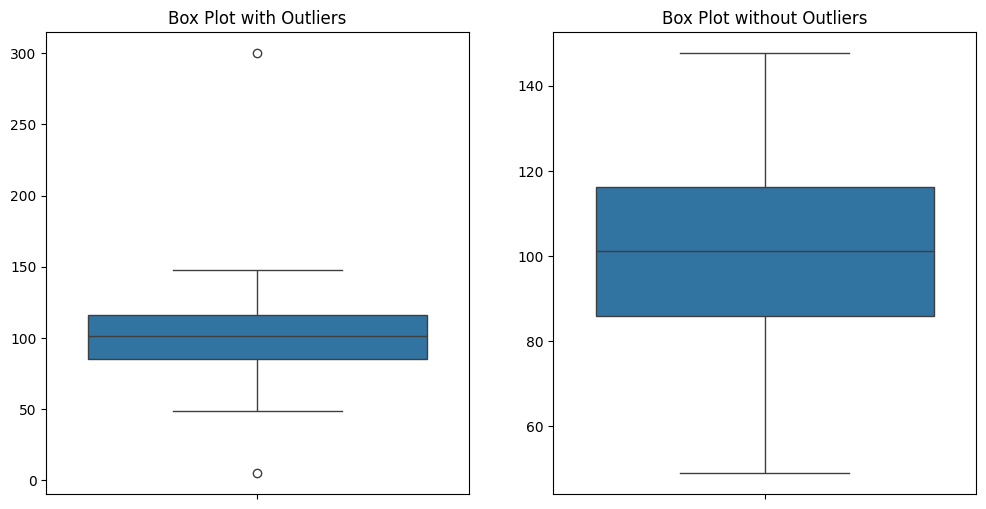

In [4]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating dataset with potential outliers
np.random.seed(0)
data = np.random.normal(100, 20, 200)
data = np.append(data, [300, 5])          # Adding outliers

# Calculating Q1, Q3, and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# Defining the outlier bounds (1.5 times the IQR)
lower_bound = Q1 -1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = (data < lower_bound) | (data > upper_bound)

# Removing outliers
data_without_outliers = data[~outliers]

# Plotting the original data with outliers
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)           # subplot(nrows, ncols, index)
sns.boxplot(data=data)
plt.title('Box Plot with Outliers')


# Plotting the data after removing outliers
plt.subplot(1,2,2)
sns.boxplot(data=data_without_outliers)
plt.title('Box Plot without Outliers')
